# Unit 5 - Financial Planning


In [167]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt
from datetime import date, timedelta

%matplotlib inline

In [168]:
# Declare datetime variables
today = date.today().isoformat()
five_yrs_ago = (date.today() - timedelta(days = 5 * 365)).isoformat()

# Print datetime variables 
print(today)
print(five_yrs_ago)

2021-05-12
2016-05-13


In [169]:
# Declare variable for outputting report
final_rpt = []

In [170]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [171]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [172]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [173]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
btc_price = btc_data['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
eth_data = requests.get(eth_url).json()
eth_price = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price
my_crypto_total = my_btc_value + my_eth_value

# Print current crypto wallet balance

btc_val_rpt = (f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
eth_val_rpt = (f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
crypto_total_rpt = (f"The total value of your crypto portfolio is ${my_crypto_total:0.2f}")

crypto_rpt = [btc_val_rpt, eth_val_rpt, crypto_total_rpt]
final_rpt.append(crypto_rpt)
for i in crypto_rpt:
    print(i)

The current value of your 1.2 BTC is $65380.80
The current value of your 5.3 ETH is $21907.71
The total value of your crypto portfolio is $87288.51


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [174]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [175]:
# Set Alpaca API key and secret
alpaca_key = os.getenv('ALPACA_API_KEY')
alpaca_secret = os.getenv('ALPACA_API_SECRET')

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_key, alpaca_secret, api_version = "v2")

In [176]:
# Format current date as ISO format

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
start = pd.Timestamp(today, tz = 'US/Pacific').isoformat()
end = pd.Timestamp(today, tz = 'US/Pacific').isoformat()
spy_agg = alpaca.get_barset(tickers, timeframe, start = start, end = end).df

# Preview DataFrame
spy_agg

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2021-05-12 00:00:00-04:00  113.98  114.01  113.79  113.79  6392314  411.23   

                                                           
                             high  low   close     volume  
time                                                       
2021-05-12 00:00:00-04:00  412.59  404  405.44  117671634

In [177]:
# Pick AGG and SPY close prices
agg_close_price = spy_agg.iloc[0, 3]
spy_close_price = spy_agg.iloc[0, 8]

# Print AGG and SPY close prices
agg_close_rpt = (f"Current AGG closing price: ${agg_close_price:0.2f}")
spy_close_rpt = (f"Current SPY closing price: ${spy_close_price:0.2f}")

stock_price_rpt = [agg_close_rpt, spy_close_rpt]
final_rpt.append(stock_price_rpt)
for i in stock_price_rpt:
    print(i)

Current AGG closing price: $113.79
Current SPY closing price: $405.44


In [183]:

for i in final_rpt:
    for j in i:
        print(j)

The current value of your 1.2 BTC is $65380.80
The current value of your 5.3 ETH is $21907.71
The total value of your crypto portfolio is $87288.51
Current AGG closing price: $113.79
Current SPY closing price: $405.44
The current value of your 200 AGG shares is $22758.00
The current value of your 50 SPY shares is $20272.00
The total value of your shares is $43030.00
Your have a total of $130318.51 in savings
67% of your savings is in crypto-currency
33% of your savings is in stocks & bonds
![Savings Pie Chart](Images/pie.png)


In [179]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price
my_stocks_total = my_agg_value + my_spy_value

# Print current value of share
my_spy_rpt = (f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
my_agg_rpt = (f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
my_shares_rpt = (f"The total value of your shares is ${my_stocks_total:0.2f}")

shares_rpt = [my_agg_rpt, my_spy_rpt, my_shares_rpt]
final_rpt.append(shares_rpt)
for i in shares_rpt:
    print(i)

The current value of your 200 AGG shares is $22758.00
The current value of your 50 SPY shares is $20272.00
The total value of your shares is $43030.00


### Savings Health Analysis

In [180]:
# Set monthly household income
monthly_income = 12000
# Create savings DataFrame
savings_data = [{'Savings': my_crypto_total}, {'Savings': my_stocks_total}]
df_savings = pd.DataFrame(savings_data, index = ['Crypto', 'Stocks'])
total_savings = my_crypto_total + my_stocks_total
# Display savings DataFrame
display(df_savings)
print(total_savings)

,Savings
Crypto,87288.509
Stocks,43030.000


130318.50899999999


Your have a total of $130318.51 in savings
67% of your savings is in crypto-currency
33% of your savings is in stocks & bonds


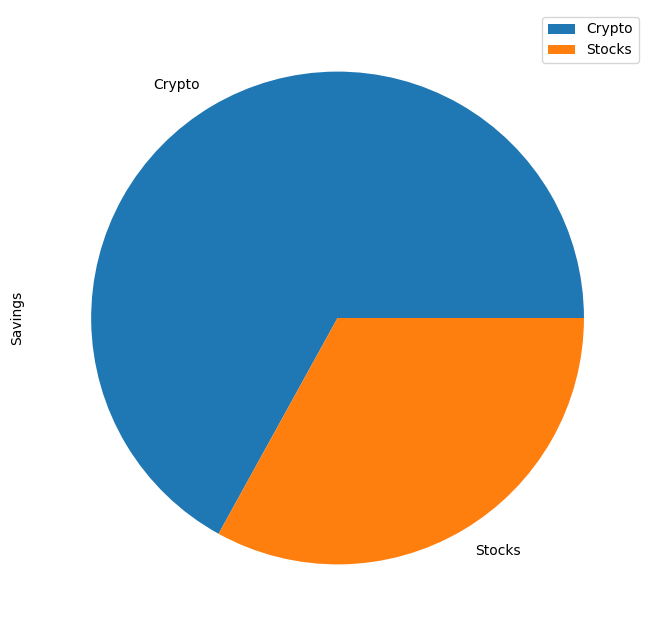

In [181]:
# Plot savings pie chart
df_savings.plot.pie(y = 'Savings', figsize = (8, 8))
plt.savefig('Images/pie.png')
pie_rpt = (f'Your have a total of ${total_savings:0.2f} in savings')
pct_crypto_rpt = (f'{((my_crypto_total / total_savings) * 100):0.0f}% of your savings is in crypto-currency')
pct_stocks_rpt = (f'{((my_stocks_total / total_savings) * 100):0.0f}% of your savings is in stocks & bonds')
savings_rpt = [pie_rpt, pct_crypto_rpt, pct_stocks_rpt]
for i in savings_rpt:
    print(i)
savings_rpt.append('![Savings Pie Chart](Images/pie.png)')
final_rpt.append(savings_rpt)

In [182]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings_total = my_crypto_total + my_shares_total

# Validate saving health
print("Congratulations, you have enough savings!") if savings_total > emergency_fund else print(f"Must increase savings by ${emergency_fund - savings_total}")

Congratulations, you have enough savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [90]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp(five_yrs_ago, tz='America/New_York').isoformat()
end_date = pd.Timestamp(today, tz='America/New_York').isoformat()

In [93]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
timeframe = '1D'
df_stock_data = alpaca.get_barset(tickers, timeframe, start = start_date, end = end_date, limit = 1000).df

# Display sample data
df_stock_data.sample(5)

AGG                                         SPY  \
                             open    high       low   close    volume    open   
time                                                                            
2021-01-07 00:00:00-05:00  117.13  117.26  117.0667  117.21   4949593  376.10   
2020-09-18 00:00:00-04:00  118.39  118.44  118.1800  118.24   4548578  335.37   
2017-08-01 00:00:00-04:00  109.38  109.72  109.3600  109.71   1930352  247.46   
2019-12-19 00:00:00-05:00  112.19  112.36  112.1350  112.29   3869419  319.80   
2020-08-05 00:00:00-04:00  119.39  119.49  119.3100  119.40  34239733  331.47   

                                                                
                             high       low    close    volume  
time                                                            
2021-01-07 00:00:00-05:00  379.90  375.9100  379.060  58862006  
2020-09-18 00:00:00-04:00  335.49  327.9700  330.690  88780313  
2017-08-01 00:00:00-04:00  247.50  246.7160  247.309  33209109  
2019-12-19 00:00:00-05:00  320.98  319.5246  320.910  61273523  
2020-08-05 00:00:00-04:00  332.39  331.1800  332.060  72941562

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30 = MCSimulation(df_stock_data, [.4, .6], 500, 252 * 30)

In [17]:
# Printing the simulation input data
df_stock_data

AGG                                         SPY  \
                             open    high       low    close   volume    open   
time                                                                            
2017-05-23 00:00:00-04:00  109.50  109.53  109.2100  109.240  1194872  239.95   
2017-05-24 00:00:00-04:00  109.25  109.50  109.2115  109.450  2325960  240.32   
2017-05-25 00:00:00-04:00  109.45  109.49  109.3701  109.460  1382257  241.20   
2017-05-26 00:00:00-04:00  109.46  109.54  109.4400  109.480   853245  241.55   
2017-05-30 00:00:00-04:00  109.58  109.66  109.5400  109.635  1199625  241.33   
...                           ...     ...       ...      ...      ...     ...   
2021-05-06 00:00:00-04:00  114.55  114.71  114.5300  114.650  4557124  415.83   
2021-05-07 00:00:00-04:00  114.85  114.97  114.5700  114.645  6812067  419.89   
2021-05-10 00:00:00-04:00  114.61  114.72  114.4000  114.430  4737416  422.50   
2021-05-11 00:00:00-04:00  114.23  114.38  114.1300  114.190  5986456  413.10   
2021-05-12 00:00:00-04:00  113.98  114.01  113.7900  113.800  5982042  411.23   

                                                                 
                              high      low    close     volume  
time                                                             
2017-05-23 00:00:00-04:00  240.240  239.510  240.020   36771135  
2017-05-24 00:00:00-04:00  240.730  239.930  240.590   37423590  
2017-05-25 00:00:00-04:00  242.080  240.960  241.710   45278321  
2017-05-26 00:00:00-04:00  241.900  241.450  241.740   30002081  
2017-05-30 00:00:00-04:00  241.790  241.160  241.520   28437351  
...                            ...      ...      ...        ...  
2021-05-06 00:00:00-04:00  419.210  413.675  419.080   65404082  
2021-05-07 00:00:00-04:00  422.815  419.160  422.090   58002195  
2021-05-10 00:00:00-04:00  422.740  417.810  417.980   72076213  
2021-05-11 00:00:00-04:00  415.270  410.060  414.270  105864172  
2021-05-12 00:00:00-04:00  412.590  405.230  406.035  100243917  

[1000 rows x 10 columns]

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim_30.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992815,0.994933,1.013203,1.000357,0.982678,0.999342,0.994247,0.993341,1.007928,1.008575,...,1.000255,1.007579,0.989714,1.011824,1.006589,0.989954,0.984075,1.009009,1.016789,1.004560
2,0.998410,0.975174,1.015431,1.007893,0.994127,0.990141,0.996799,0.991644,1.010868,1.011921,...,1.001572,1.011464,0.992750,1.009821,1.024309,0.979159,0.990348,1.012335,1.015043,1.007138
3,1.006105,0.979682,1.013716,0.999802,0.988287,0.987158,1.005198,0.977086,1.011230,1.021163,...,0.997418,1.014340,0.986792,1.010092,1.023687,0.983466,0.989612,1.012459,1.024329,1.014404
4,0.990429,0.982268,1.010861,0.989654,0.992651,0.984844,0.990498,0.974975,1.009978,1.029159,...,0.997583,1.002749,0.984534,1.016782,1.011305,0.979661,0.999488,1.005693,1.010176,1.014660
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,19.892305,41.549237,21.721316,15.406459,9.103639,13.820438,13.571446,17.048673,24.320461,6.117894,...,41.987162,20.367056,11.862037,30.033437,13.365904,18.300095,7.665540,19.869787,5.768635,16.272919
7557,19.800493,41.143916,21.526855,15.418250,9.221008,13.932444,13.510213,16.942731,24.348597,6.157563,...,42.446474,20.360640,11.805991,29.993408,13.291334,18.383555,7.713027,19.672729,5.777500,16.301334
7558,19.783336,40.926864,21.661844,15.413311,9.275541,13.962471,13.708160,16.918822,24.589269,6.208646,...,42.992169,20.045113,11.935204,29.894473,13.317988,18.294286,7.781064,19.787131,5.772754,16.481212
7559,19.518529,41.169741,21.426326,15.201340,9.214828,13.821074,13.731128,17.140746,24.912139,6.229035,...,43.278092,20.428297,11.788005,30.277118,13.252634,18.308655,7.778919,19.716326,5.784636,16.275980


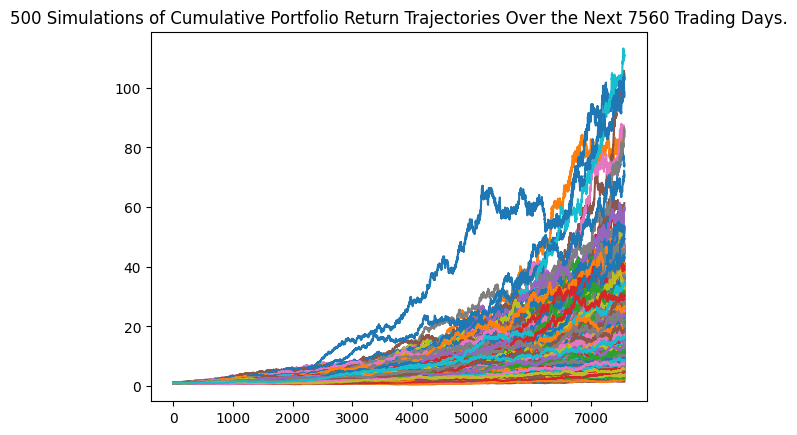

In [45]:
# Plot simulation outcomes
mc_sim_30.plot_simulation()
plt.savefig('Images/sim_returns_30.png')

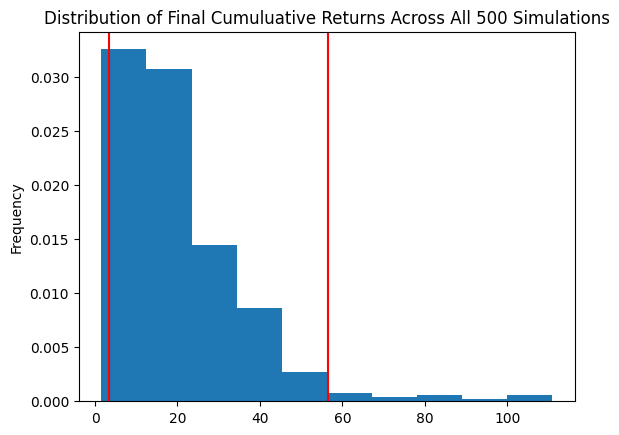

In [44]:
# Plot probability distribution and confidence intervals
mc_sim_30.plot_distribution()
plt.savefig('Images/dist_returns_30.png')

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
my_sim_summary = mc_sim_30.summarize_cumulative_return()

# Print summary statistics
print(my_sim_summary)

count           500.000000
mean             20.324815
std              15.441475
min               1.520022
25%               9.933527
50%              16.292976
75%              25.781448
max             110.936837
95% CI Lower      3.461912
95% CI Upper     56.406365
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(my_sim_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper = round(my_sim_summary.loc['95% CI Upper'] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $69238.25 and $1128127.31


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(my_sim_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper = round(my_sim_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $103857.37 and $1692190.96


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim_5 = MCSimulation(df_stock_data, [.1, .9], 500, 252 * 5)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
mc_sim_5.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000343,1.003861,1.002273,0.988345,1.017736,0.985641,0.996619,0.979827,0.988953,1.005239,...,0.987405,0.984052,1.018743,0.997069,1.001815,1.001022,1.008983,1.003313,1.002472,0.987844
2,0.990081,1.011987,0.990891,1.011421,1.028369,0.995190,0.983999,0.990436,0.976519,1.005653,...,0.983044,0.990584,1.016005,0.984818,0.994720,0.986055,1.006325,0.998352,0.983407,0.997280
3,0.996142,1.010220,1.011311,1.008164,1.050892,0.995565,0.988646,0.979527,0.969726,0.999971,...,0.979877,1.006915,1.011522,0.983836,0.981919,0.987020,1.021995,0.974810,0.977218,0.998682
4,0.992610,1.018918,1.017738,1.020587,1.052870,0.996985,1.001241,1.010402,0.969396,0.969909,...,0.956915,1.022568,1.010482,0.969830,0.981055,0.985706,1.016876,0.966707,0.976736,0.990320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.633377,2.699919,2.208768,2.258947,1.407069,2.380139,2.224568,1.835071,0.783432,3.145355,...,2.914594,2.232546,3.157725,2.695898,1.759242,2.122401,2.306448,1.773273,1.860794,2.109942
1257,2.613957,2.705397,2.192679,2.247438,1.389705,2.410900,2.228944,1.859920,0.788075,3.029197,...,2.980076,2.219345,3.127610,2.693344,1.771031,2.108494,2.321260,1.831338,1.860936,2.103025
1258,2.667515,2.663028,2.134332,2.236877,1.368148,2.419658,2.214628,1.867181,0.788361,2.999941,...,2.992670,2.236081,3.115406,2.750546,1.759223,2.075052,2.260272,1.830869,1.833639,2.113591
1259,2.656290,2.744594,2.078874,2.248538,1.399010,2.445427,2.183880,1.849163,0.773865,3.041170,...,2.984707,2.224091,3.126344,2.753606,1.759493,2.064823,2.270375,1.871839,1.821645,2.124264


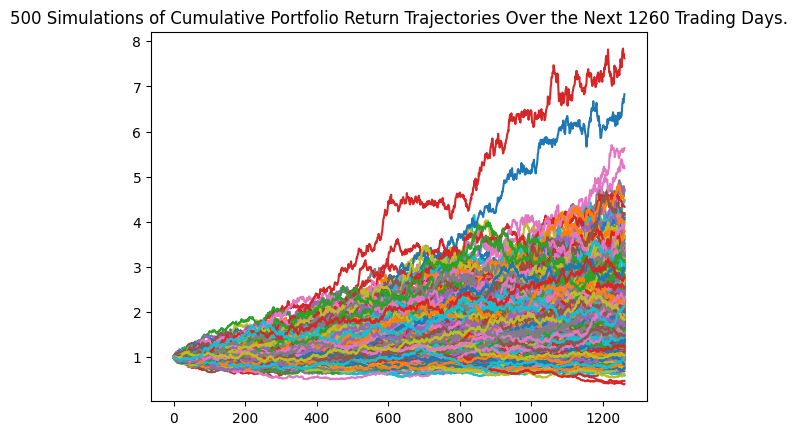

In [46]:
# Plot simulation outcomes
mc_sim_5.plot_simulation()
plt.savefig('Images/sim_returns_5.png')

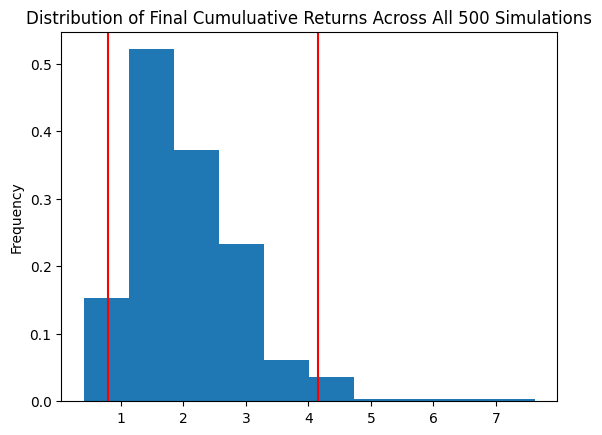

In [47]:
# Plot probability distribution and confidence intervals
mc_sim_5.plot_distribution()
plt.savefig('Images/dist_returns_5.png')

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
my_sim_5_summary = mc_sim_5.summarize_cumulative_return()

# Print summary statistics
print(my_sim_5_summary)

count           500.000000
mean              2.056910
std               0.900806
min               0.408335
25%               1.439319
50%               1.868229
75%               2.565907
max               7.621454
95% CI Lower      0.790800
95% CI Upper      4.160313
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(my_sim_5_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper_five = round(my_sim_5_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within the range of $15816.0 and $83206.26


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_10 = MCSimulation(df_stock_data, [.1, .9], 500, 252 * 10)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
mc_sim_10.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.988256,0.995888,1.003684,1.002681,1.000657,1.018072,1.002307,0.989739,0.995553,0.983610,...,0.988462,0.989268,1.014659,0.988939,0.999404,1.004456,0.999133,1.020432,1.009921,0.982305
2,0.998877,0.993990,1.010567,1.005599,1.001569,1.023875,1.017624,0.999286,1.022243,0.975383,...,0.965904,0.990912,0.992734,0.987389,0.981610,0.997098,0.998604,1.028817,1.025332,0.975787
3,0.988244,0.997385,1.006136,1.031130,0.985676,1.033006,0.994357,1.022083,1.023825,0.975056,...,0.964577,0.994771,1.011236,0.966463,0.974485,0.993301,1.001558,1.025405,1.009730,0.974226
4,0.983867,0.999441,1.009348,1.041923,0.972274,1.033053,0.987080,1.020012,1.021304,0.973053,...,0.964760,1.001998,1.025236,0.978427,0.987283,0.989974,0.995202,1.035761,1.024116,0.973487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.693422,4.337749,4.234780,25.572535,5.492076,3.090513,2.417861,2.285008,6.067645,3.244463,...,3.240382,4.138981,1.598324,5.445637,8.321743,2.677046,3.698903,6.950328,2.647556,6.044247
2517,1.701266,4.242078,4.175988,25.663968,5.474162,3.040377,2.426303,2.274967,5.923139,3.211349,...,3.198021,4.155943,1.584472,5.527207,8.433678,2.646562,3.717971,6.851026,2.669391,6.081796
2518,1.722702,4.235900,4.196554,25.743135,5.454360,2.912457,2.414258,2.234336,5.917764,3.246319,...,3.222258,4.148454,1.607279,5.433731,8.422331,2.657013,3.720693,6.934868,2.689850,6.203994
2519,1.740815,4.231712,4.190476,25.636446,5.466738,2.907327,2.416846,2.213455,5.863693,3.227244,...,3.177672,4.088296,1.616310,5.422281,8.488200,2.644939,3.670180,6.934100,2.660027,6.164289


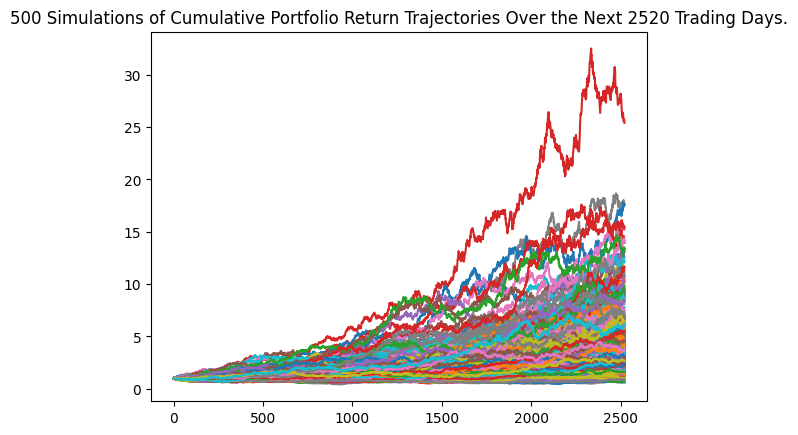

In [48]:
# Plot simulation outcomes
mc_sim_10.plot_simulation()
plt.savefig('Images/sim_returns_10.png')

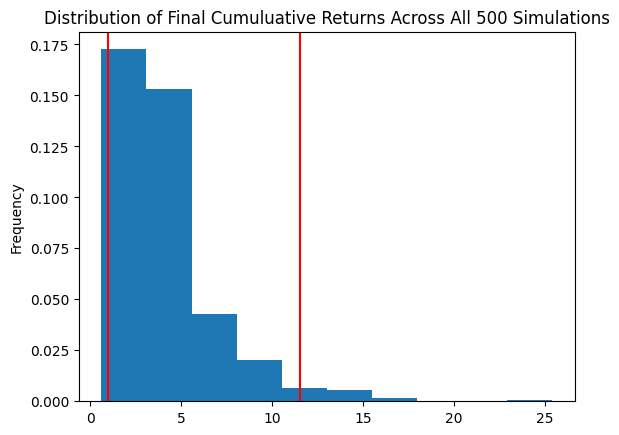

In [49]:
# Plot probability distribution and confidence intervals
mc_sim_10.plot_distribution()
plt.savefig('Images/dist_returns_10.png')

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
my_sim_10_summary = mc_sim_10.summarize_cumulative_return()

# Print summary statistics
print(my_sim_10_summary)

count           500.000000
mean              4.081094
std               2.819721
min               0.604230
25%               2.245820
50%               3.462716
75%               5.119529
max              25.398049
95% CI Lower      0.984699
95% CI Upper     11.508459
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(my_sim_10_summary.loc['95% CI Lower'] * initial_investment, 2)
ci_upper_ten = round(my_sim_10_summary.loc['95% CI Upper'] * initial_investment, 2)

# Print result
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 10 years will end within in the range of $19693.98 and $230169.18


In [36]:
# Find initial investment needed to achieve mean return of 30 year investment

# Declare variable with value of original retire-at-30 years analysis mean
thirty_yr_mean = my_sim_summary.loc['mean'] * initial_investment

# Declare variabls for simulated 5 & 10 year means
mean_five = my_sim_5_summary.loc['mean']
mean_ten = my_sim_10_summary.loc['mean']

# Define a function that accepts simulated mean and targeted return
# Returns initial investment needed to reach target
def find_initial_investment(mean, target):
    i = 0
    while (i * mean) < target:
        i += 1000
    
    return i

# Run function on simulated 5 & 10 year means
five_investment = find_initial_investment(mean_five, thirty_yr_mean)
ten_investment = find_initial_investment(mean_ten, thirty_yr_mean)

# Explain the findings
print(f'The mean return on ${initial_investment} invested for 30 years is ${thirty_yr_mean:0.2f}.')
print(f'In order to achieve the same mean investment in 10 years, you need to invest ${ten_investment:0.2f}.')
print(f'The amount increase to ${five_investment} if you expect that mean return in only 5 years.')

The mean return on $20000 invested for 30 years is $406496.30.
In order to achieve the same mean investment in 10 years, you need to invest $100000.00.
The amount increase to $198000 if you expect that mean return in only 5 years.
